In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 200)
df = pd.read_csv('estaticos_market.csv', index_col=0).sample(3000)

In [3]:
df.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
58882,cc82bea59562466e54e5aae4eaaa39a44fb8feb7300f74...,True,SOCIEDADE EMPRESARIA LIMITADA,MA,ENTIDADES EMPRESARIAIS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,16.158904,15 a 20,False,False,Fal

In [4]:
df.shape

(3000, 181)

In [5]:
df['de_natureza_juridica'].isna().sum()

0

In [6]:
df['de_ramo'].isna().sum()

0

In [7]:
df['nm_segmento'].isna().sum()

5

In [8]:
df['nm_divisao'].value_counts()

COMERCIO VAREJISTA                                                                                                          1134
ATIVIDADES DE ORGANIZACOES ASSOCIATIVAS                                                                                      260
ALIMENTACAO                                                                                                                  181
COMERCIO E REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS                                                                  143
OUTRAS ATIVIDADES DE SERVICOS PESSOAIS                                                                                       104
COMERCIO POR ATACADO EXCETO VEICULOS AUTOMOTORES E MOTOCICLETAS                                                               90
SERVICOS ESPECIALIZADOS PARA CONSTRUCAO                                                                                       81
EDUCACAO                                                                                         

In [9]:
df['qt_filiais'].isna().sum()

0

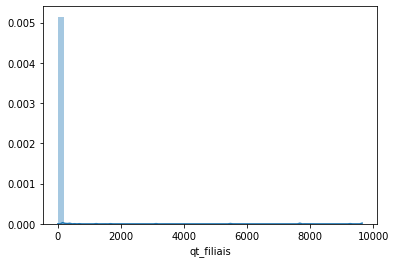

In [10]:
sns.distplot(df['qt_filiais'])

In [11]:
sub_dataset = df[['de_natureza_juridica','de_ramo','qt_filiais']]

In [12]:
dummy_sd = pd.get_dummies(sub_dataset,drop_first=True)

In [13]:
X = pd.concat([df['id'],dummy_sd], axis='columns')

In [14]:
X.head()

,id,qt_filiais,de_natureza_juridica_AUTARQUIA FEDERAL,de_natureza_juridica_AUTARQUIA MUNICIPAL,de_natureza_juridica_CANDIDATO A CARGO POLITICO ELETIVO,de_natureza_juridica_CLUBE FUNDO DE INVESTIMENTO,de_natureza_juridica_CONDOMINIO EDILICIO,de_natureza_juridica_CONSORCIO DE SOCIEDADES,de_natureza_juridica_COOPERATIVA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,de_natureza_juridica_EMPRESA INDIVIDUAL IMOBILIARIA,de_natureza_juridica_EMPRESA PUBLICA,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_ENTIDADE SINDICAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUBFEDERAL,de_natureza_juridica_FUNDO PUBLICO,de_natureza_juridica_MUNICIPIO,de_natureza_juridica_ORGANIZACAO RELIGIOSA,de_natureza_juridica_ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL,de_natureza_juridica_SERVICO NOTARIAL E REGISTRAL CARTORIO,de_natureza_juridica_SERVICO SOCIAL AUTONOMO,de_natureza_juridica_SOCIEDADE ANONIMA ABERTA,de_natureza_juridica_SOCIEDADE ANONIMA FECHADA,de_natureza_juridica_SOCIEDADE DE ECONOMIA MISTA,de_natureza_juridica_SOCIEDADE EMPRESARIA EM NOME COLETIVO,de_natureza_juridica_SOCIEDADE EMPRESARIA LIMITADA,de_natureza_juridica_SOCIEDADE SIMPLES LIMITADA,de_natureza_juridica_SOCIEDADE SIMPLES PURA,de_natureza_juridica_SOCIEDADE UNIPESSOAL DE ADVOCACIA,de_ramo_ATIVIDADES IMOBILIARIAS,de_ramo_BENS DE CONSUMO,de_ramo_COMERCIO E REPARACAO DE VEICULOS,de_ramo_COMERCIO POR ATACADO,de_ramo_COMERCIO VAREJISTA,"de_ramo_CULTURA, ESPORTE E RECREACAO",de_ramo_ELETRICIDADE E GAS,de_ramo_ELETROELETRONICOS,de_ramo_FARMACEUTICA,de_ramo_INDUSTRIA AUTOMOTIVA,de_ramo_INDUSTRIA DA CONSTRUCAO,de_ramo_INDUSTRIA DIGITAL,de_ramo_INDUSTRIAS EXTRATIVAS,de_ramo_ORGANISMOS INTERNACIONAIS,de_ramo_OUTROS,de_ramo_PAPEL E CELULOSE,de_ramo_PRODUTOS DE AGROPECUARIA,de_ramo_QUIMICA-PETROQUIMICA,"de_ramo_SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE",de_ramo_SERVICOS ADMINISTRATIVOS,de_ramo_SERVICOS DE ALOJAMENTO/ALIMENTACAO,de_ramo_SERVICOS DE EDUCACAO,de_ramo_SERVICOS DE SANEAMENTO BASICO,de_ramo_SERVICOS DE SAUDE,de_ramo_SERVICOS DIVERSOS,de_ramo_SERVICOS FINANCEIROS,"de_ramo_SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",de_ramo_SERVICOS SOCIAIS,de_ramo_SIDERURGICA-METALURGIA,de_ramo_TELECOM,de_ramo_TEXTEIS,"de_ramo_TRANSPORTE, ARMAZENAGEM E CORREIO"
58882,cc82bea59562466e54e5aae4eaaa39a44fb8feb7300f74...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
333706,3438dc86d7d868bacd5efb3e64ccb28d66dc7b58302c20...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
300760,bac5af8e9978042ba722c6155b10c61c561ed205e11406...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
286501,05680c87aa138fbedab0637123fbebd9dc279ea7128702...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
256399,1dc64e6008e0f6d1d7076aeb9325c19ae87e78bd504e22...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [16]:
sd_escalado = scaler.fit_transform(dummy_sd)

In [17]:
from sklearn.cluster import KMeans

In [18]:
modelo = KMeans(n_clusters=5)

In [19]:
modelo.fit(sd_escalado)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns=dummy_sd.columns)

In [21]:
grupos

,qt_filiais,de_natureza_juridica_AUTARQUIA FEDERAL,de_natureza_juridica_AUTARQUIA MUNICIPAL,de_natureza_juridica_CANDIDATO A CARGO POLITICO ELETIVO,de_natureza_juridica_CLUBE FUNDO DE INVESTIMENTO,de_natureza_juridica_CONDOMINIO EDILICIO,de_natureza_juridica_CONSORCIO DE SOCIEDADES,de_natureza_juridica_COOPERATIVA,de_natureza_juridica_EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,de_natureza_juridica_EMPRESA INDIVIDUAL IMOBILIARIA,de_natureza_juridica_EMPRESA PUBLICA,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_ENTIDADE SINDICAL,de_natureza_juridica_FUNDACAO PUBLICA DE DIREITO PUBFEDERAL,de_natureza_juridica_FUNDO PUBLICO,de_natureza_juridica_MUNICIPIO,de_natureza_juridica_ORGANIZACAO RELIGIOSA,de_natureza_juridica_ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU DO DISTRITO FEDERAL,de_natureza_juridica_ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL,de_natureza_juridica_SERVICO NOTARIAL E REGISTRAL CARTORIO,de_natureza_juridica_SERVICO SOCIAL AUTONOMO,de_natureza_juridica_SOCIEDADE ANONIMA ABERTA,de_natureza_juridica_SOCIEDADE ANONIMA FECHADA,de_natureza_juridica_SOCIEDADE DE ECONOMIA MISTA,de_natureza_juridica_SOCIEDADE EMPRESARIA EM NOME COLETIVO,de_natureza_juridica_SOCIEDADE EMPRESARIA LIMITADA,de_natureza_juridica_SOCIEDADE SIMPLES LIMITADA,de_natureza_juridica_SOCIEDADE SIMPLES PURA,de_natureza_juridica_SOCIEDADE UNIPESSOAL DE ADVOCACIA,de_ramo_ATIVIDADES IMOBILIARIAS,de_ramo_BENS DE CONSUMO,de_ramo_COMERCIO E REPARACAO DE VEICULOS,de_ramo_COMERCIO POR ATACADO,de_ramo_COMERCIO VAREJISTA,"de_ramo_CULTURA, ESPORTE E RECREACAO",de_ramo_ELETRICIDADE E GAS,de_ramo_ELETROELETRONICOS,de_ramo_FARMACEUTICA,de_ramo_INDUSTRIA AUTOMOTIVA,de_ramo_INDUSTRIA DA CONSTRUCAO,de_ramo_INDUSTRIA DIGITAL,de_ramo_INDUSTRIAS EXTRATIVAS,de_ramo_ORGANISMOS INTERNACIONAIS,de_ramo_OUTROS,de_ramo_PAPEL E CELULOSE,de_ramo_PRODUTOS DE AGROPECUARIA,de_ramo_QUIMICA-PETROQUIMICA,"de_ramo_SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE",de_ramo_SERVICOS ADMINISTRATIVOS,de_ramo_SERVICOS DE ALOJAMENTO/ALIMENTACAO,de_ramo_SERVICOS DE EDUCACAO,de_ramo_SERVICOS DE SANEAMENTO BASICO,de_ramo_SERVICOS DE SAUDE,de_ramo_SERVICOS DIVERSOS,de_ramo_SERVICOS FINANCEIROS,"de_ramo_SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",de_ramo_SERVICOS SOCIAIS,de_ramo_SIDERURGICA-METALURGIA,de_ramo_TELECOM,de_ramo_TEXTEIS,"de_ramo_TRANSPORTE, ARMAZENAGEM E CORREIO"
0,-0.039165,0.037632,0.037632,0.079923,0.026606,0.096120,0.037632,0.070462,0.256871,0.070462,-0.031639,-1.074436,0.084261,0.026606,0.053238,0.059532,0.103284,0.225204,0.046098,0.046098,0.059532,0.026606,0.026606,0.037632,0.037632,0.010229,0.099765,0.047737,-0.018260,0.698496,0.088388,0.065224,0.079923,-0.079835,-0.085489,-0.104560,0.078593,-0.404592,0.027398,0.079923,0.026606,0.026606,0.026606,0.026135,-0.000995,0.075340,0.026606,0.019375,-0.041034,0.039680,0.054376,0.058714,0.010425,-0.147716,0.070824,0.049973,0.132154,0.582970,-0.003628,0.013383,0.037632,-0.052907,0.006983,-0.036539,-0.037562
1,-0.063026,-0.025828,-0.025828,-0.054855,-0.018260,-0.065971,-0.025828,-0.048361,-0.185695,-0.048361,-0.031639,0.763072,-0.057831,-0.018260,-0.036539,-0.040859,-0.070888,-0.154566,-0.031639,-0.031639,-0.040859,-0.018260,-0.018260,-0.025828,-0.025828,-0.044766,-0.068473,-0.060664,-0.018260,-0.492175,-0.060664,-0.044766,-0.054855,-0.079835,-0.211112,-0.223724,-0.175863,-0.779562,-0.102182,-0.054855,-0.018260,-0.018260,-0.018260,-0.223724,-0.057831,-0.051709,-0.018260,-0.040859,-0.065971,-0.068473,-0.079835,-0.065971,-0.217913,-0.261488,-0.164455,-0.054855,-0.156813,-0.400116,-0.065971,-0.193247,-0.025828,-0.107067,-0.111747,27.367864,-0.181818
2,-0.062678,-0.025828,-0.025828,-0.054855,-0.018260,-0.065971,-0.025828,-0.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f11744bbe48>,
      dtype=object)

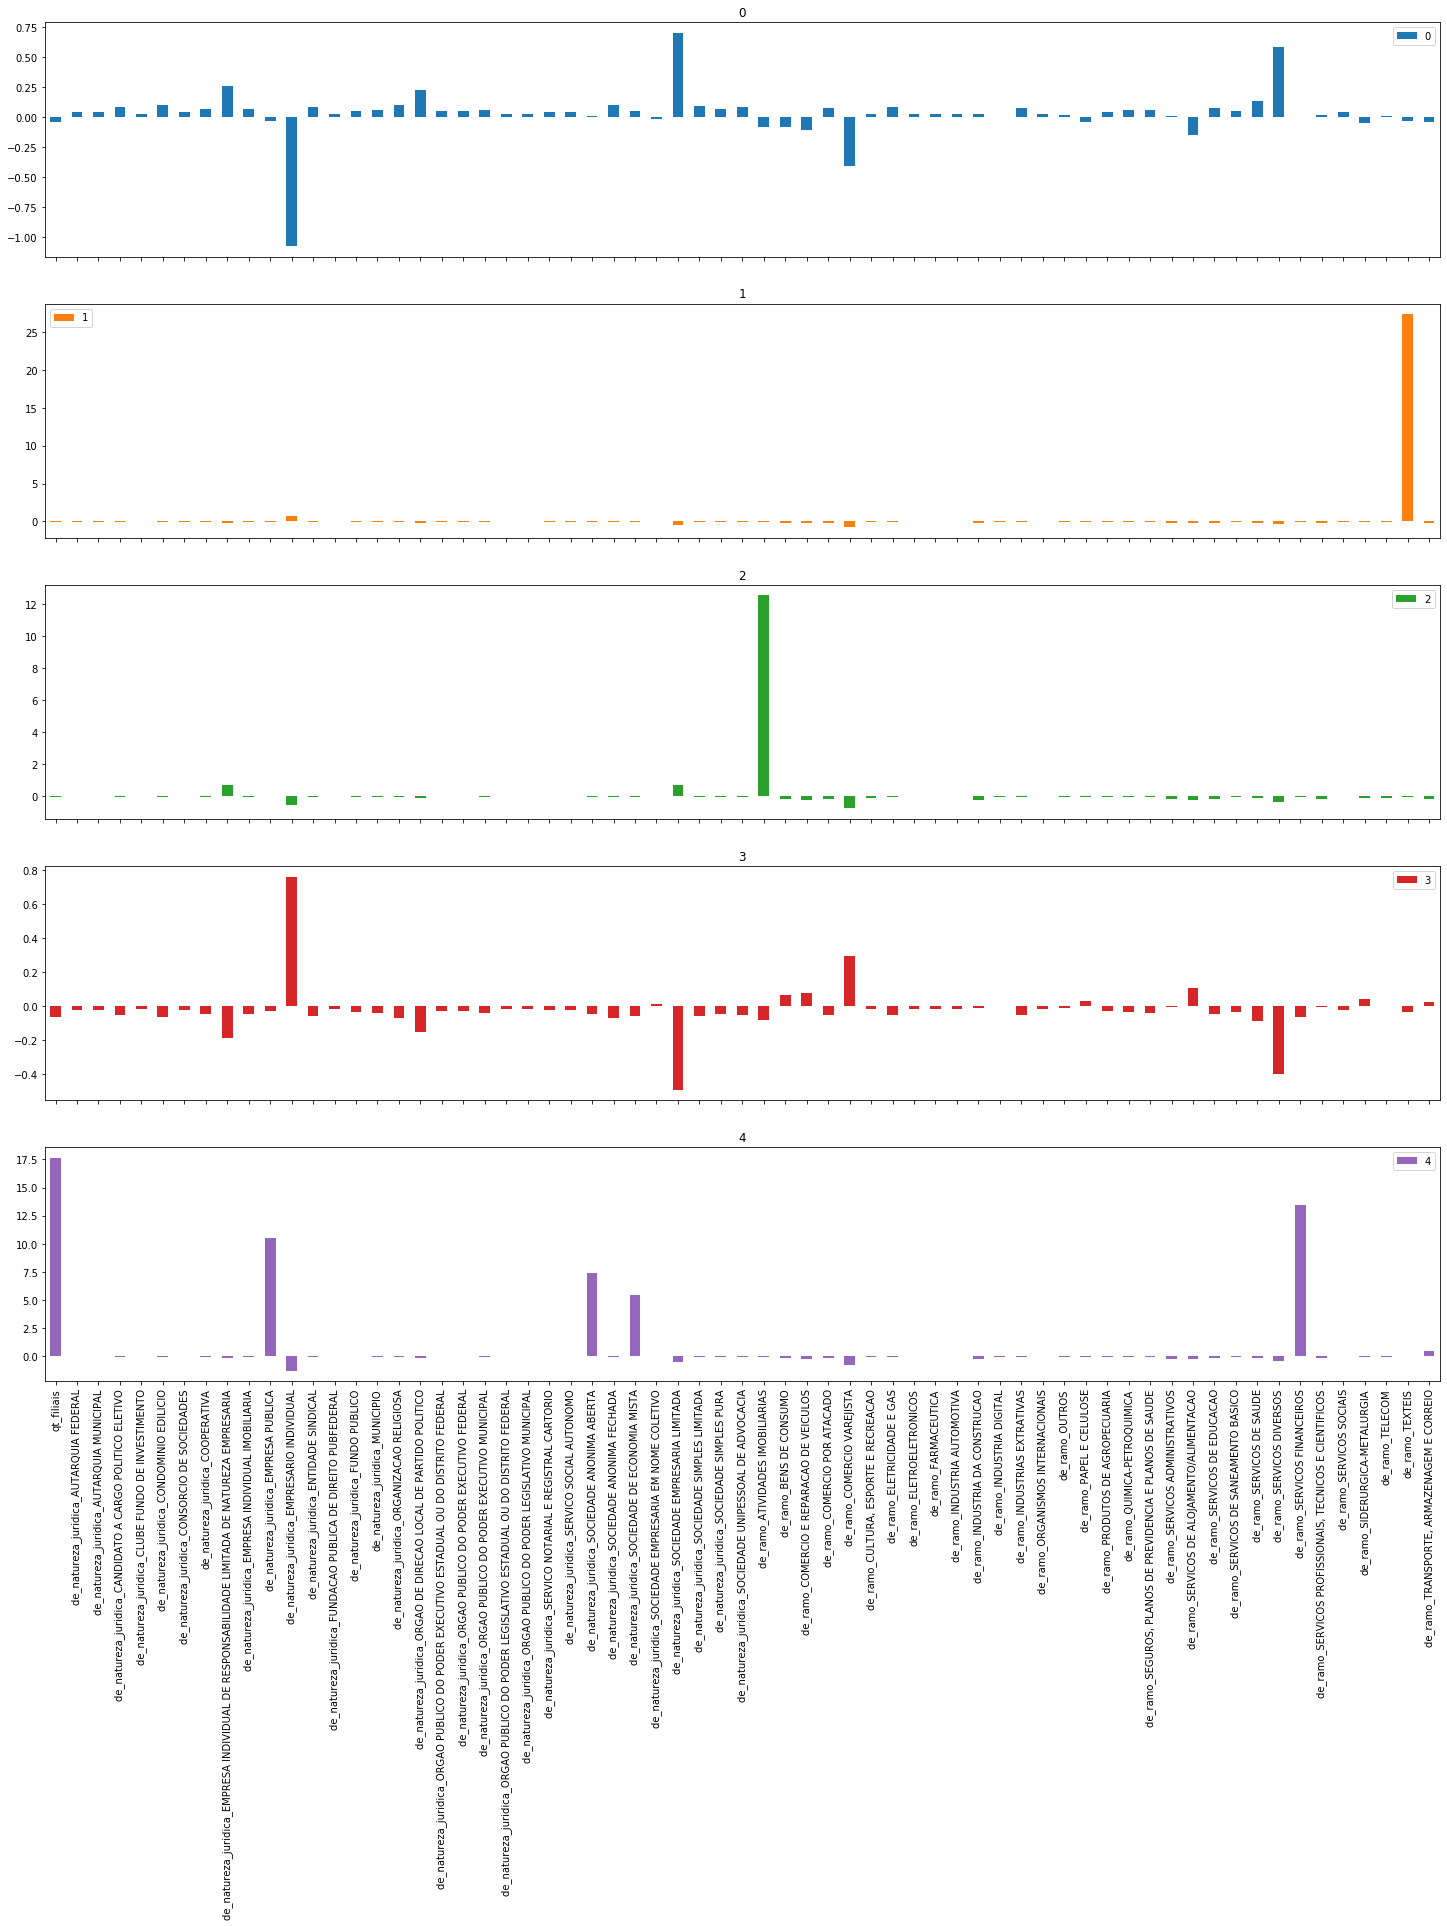

In [22]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,25))

In [23]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=6)
Y = tsne.fit_transform(sd_escalado)

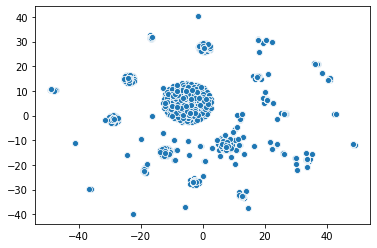

In [24]:
ax = sns.scatterplot(x=Y[:,0],
               y=Y[:,1])